In [1]:
from my_methods import *

In [2]:
E_mul = json_load('ExE_mul_splitted.json')
E_add = json_load('ExE_add_splitted.json')

In [10]:
def find_similar_connections(dic1, dic2, int_dif=5):
    sim_conct = []
    for k in dic1.keys():
        try:
            cnt1 = len(dic1[k].keys())
            cnt2 = len(dic2[k].keys())
            if abs(cnt1-cnt2)<=int_dif:
                sim_conct.append(k)
        except:
            pass
    return sim_conct

def find_different_profiles(gene, dic1, dic2):
    common_int = set(dic1[gene].keys()).intersection(set(dic2[gene].keys()))
    x_list = [dic1[gene][k] for k in common_int]
    y_list = [dic2[gene][k] for k in common_int]
    try:
        value = scipy.stats.pearsonr(x_list, y_list)
        if value[1]<0.05:
            return gene, value[0]
    except:
        pass

In [49]:
similar_con = find_similar_connections(E_mul, E_add, int_dif=15)

In [50]:
gene_pcc = []
for gene in similar_con:
    tup = find_different_profiles(gene, E_mul, E_add)
    gene_pcc.append(tup)

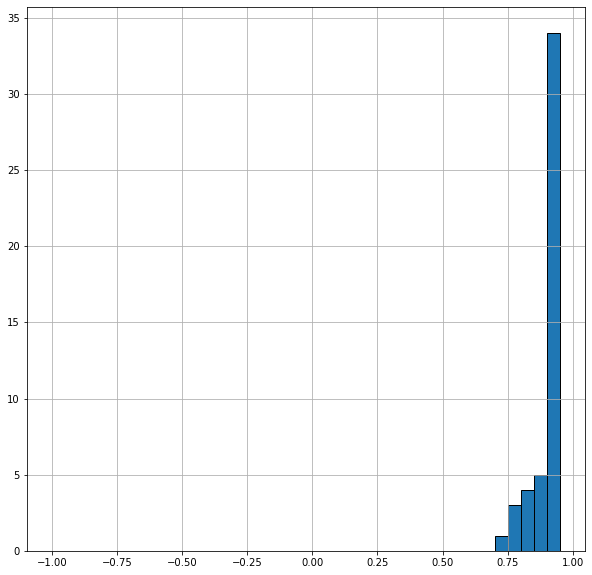

In [51]:
def select(x):
    return x[1] if x!=None else float('nan')

l = list(map(lambda x: select(x), gene_pcc))
a = plt.hist(l, bins=np.arange(-1,1,0.05), edgecolor='k')
plt.grid()

In [52]:
# Tratando de buscar genes que en ambas redes esten conectados parecido encuentro que los que tienen grados cercanos en ambas redes
# son de perfiles de interaccion parecidos, entonces no puedo comparar diferencias aqui

547